## Crypto Arbitrage

The objective of this notebook is to study bitcoin arbitrage opportunities between Bitstamp and Coinbase for the year of 2018.



###  Importing the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collecting the Data

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Index column set to "Date"
# Parse_dates and infer_datetime_format parameters set
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [3]:
# Confirming CSV imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [4]:
# Repeating above steps to read in Coinbase data
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [5]:
# Coinbase imported properly
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

In [6]:
# Drop all missing values from Bitstamp dataframe
bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [7]:
# Removing dollar signs with .str.replace
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].str.replace('$','')
bitstamp.head()

C:\Users\gtkhh\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


In [8]:
# Converting data from string to float
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].astype('float')
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [9]:
# Checking for duplicates
bitstamp.duplicated().sum()

0

## Repeating Data Prep for Coinbase

In [10]:
# Coinbase drop missing values
coinbase = coinbase.dropna()
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [11]:
#Coinbase dollar sign removal
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].str.replace('$','')
coinbase.head()

C:\Users\gtkhh\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [12]:
# Convert the Close data type to a float
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].astype('float')
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [13]:
# Check for duplicates
coinbase.duplicated().sum()

0

## Analyze the Data

In [14]:
# Isolating 'Close' from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']
# Review
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [15]:
# Isolating `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Review
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

In [16]:
# Generate summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [17]:
# Generate summary statistics for the coinbase DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

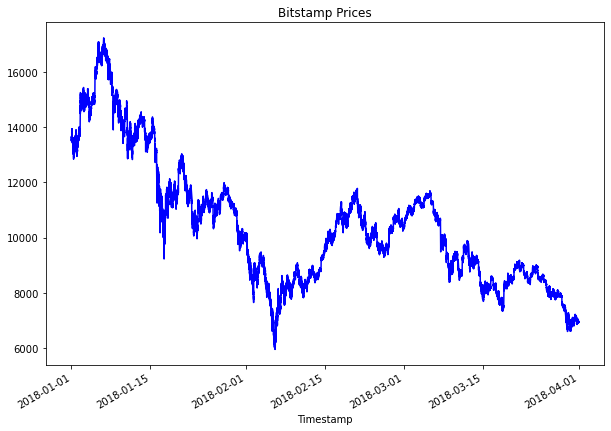

In [18]:
# Creating a line plot for the Bitstamp dataframe
bitstamp_sliced.plot(title='Bitstamp Prices', figsize=(10,7), color='blue')

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

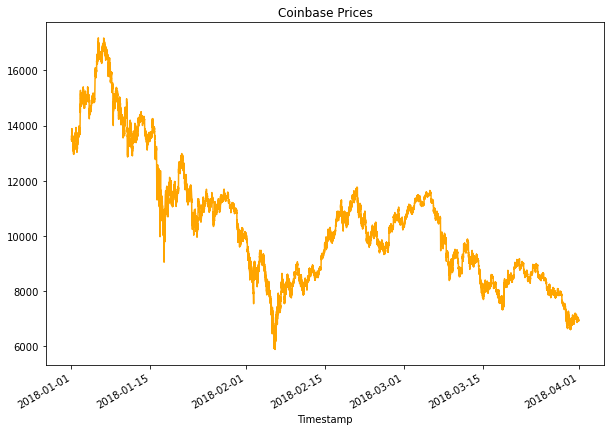

In [19]:
# Creating a line plot for the coinbase DataFrame
coinbase_sliced.plot(title='Coinbase Prices', figsize=(10,7), color='orange')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

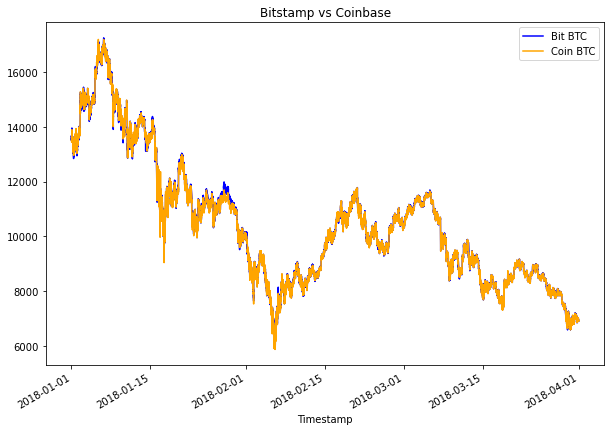

In [20]:
# Overlaying both dataframes
bitstamp_sliced.plot(legend=True, title='Bitstamp vs Coinbase', figsize=(10,7), color='blue', label='Bit BTC')
coinbase_sliced.plot(legend=True, figsize=(10,7), color='orange', label='Coin BTC')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

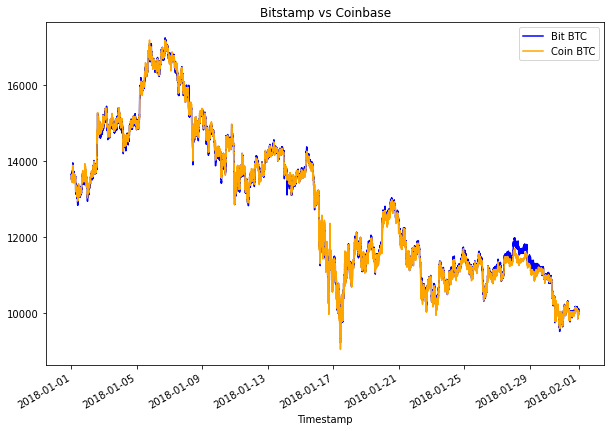

In [21]:
# Overlaying both dataframes for the month of January, the beginning of the dataset
bitstamp_sliced.loc['2018-01'].plot(legend=True, title='Bitstamp vs Coinbase', figsize=(10,7), color='blue', label='Bit BTC')
coinbase_sliced.loc['2018-01'].plot(legend=True, figsize=(10,7), color='orange', label='Coin BTC')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

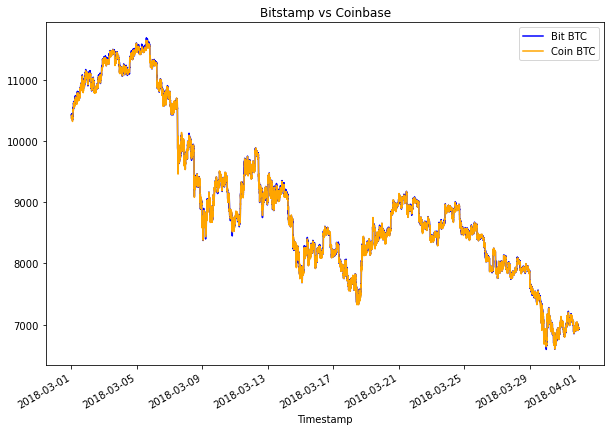

In [22]:
# Overlaying both Dataframes for the month of March, the end of the dataset
bitstamp_sliced.loc['2018-03'].plot(legend=True, title='Bitstamp vs Coinbase', figsize=(10,7), color='blue', label='Bit BTC')
coinbase_sliced.loc['2018-03'].plot(legend=True, figsize=(10,7), color='orange', label='Coin BTC')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, you can see far less deviation in the later plot.

## Calculating Arbitrage Spread

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

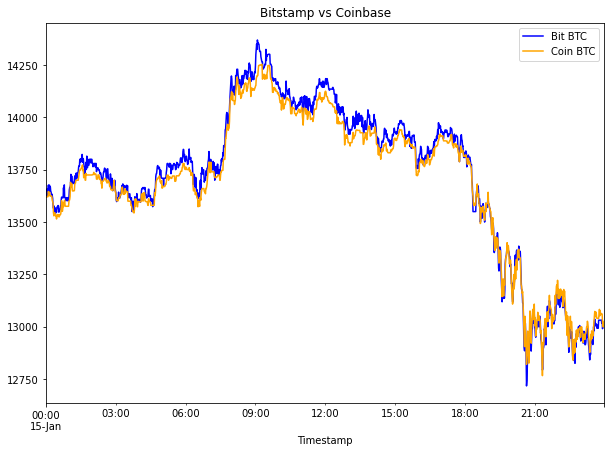

In [23]:
# Making an overlay plot for a single day on January 15th
bitstamp_sliced.loc['2018-01-15'].plot(legend=True, title='Bitstamp vs Coinbase', figsize=(10,7), color='blue', label='Bit BTC')
coinbase_sliced.loc['2018-01-15'].plot(legend=True, figsize=(10,7), color='orange', label='Coin BTC')

In [24]:
# Calculating arbitrage spread by subtracting lower price exchange (Coinbase) from higher (Bitstamp)
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-15'] - coinbase_sliced.loc['2018-01-15']

# Generate summary statistics
arbitrage_spread_early.describe()


count    1440.000000
mean       28.953458
std        35.145705
min      -106.080000
25%        10.000000
50%        34.035000
75%        52.217500
max       170.980000
Name: Close, dtype: float64

<AxesSubplot:>

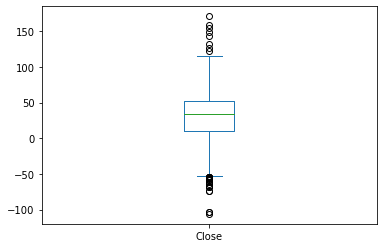

In [25]:
# Visualizeingthe arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

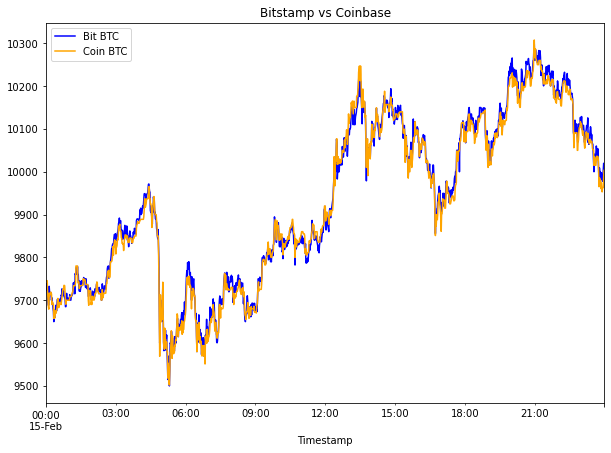

In [26]:
# Making an overlay plot for February 15th` 
bitstamp_sliced.loc['2018-02-15'].plot(legend=True, title='Bitstamp vs Coinbase', figsize=(10,7), color='blue', label='Bit BTC')
coinbase_sliced.loc['2018-02-15'].plot(legend=True, figsize=(10,7), color='orange', label='Coin BTC')

In [27]:
# Calculating arbitrage spread
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-15'] - coinbase_sliced.loc['2018-02-15']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64

<AxesSubplot:>

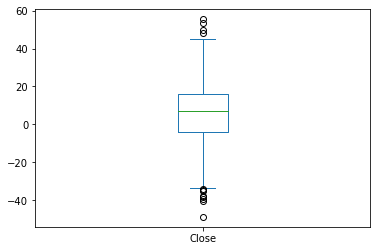

In [28]:
# Visualizing the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

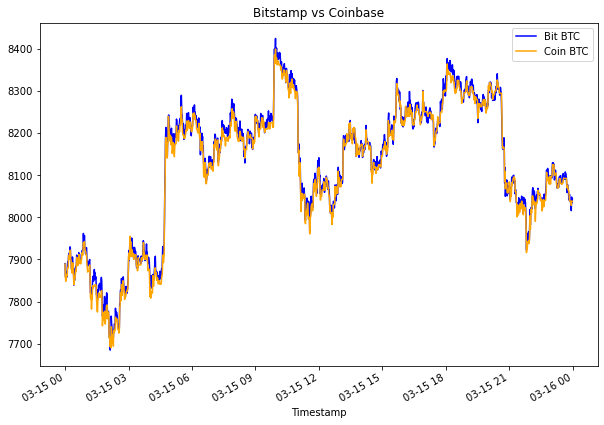

In [29]:
# Creating an overlay plot for March 15th
bitstamp_sliced.loc['2018-03-15'].plot(legend=True, title='Bitstamp vs Coinbase', figsize=(10,7), color='blue', label='Bit BTC')
coinbase_sliced.loc['2018-03-15'].plot(legend=True, figsize=(10,7), color='orange', label='Coin BTC')

In [30]:
# Calculating arbitrage spread
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-15'] - coinbase_sliced.loc['2018-03-15']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1437.00000
mean        8.76572
std        10.74975
min       -24.71000
25%         1.74000
50%         8.74000
75%        15.74000
max        48.98000
Name: Close, dtype: float64

<AxesSubplot:>

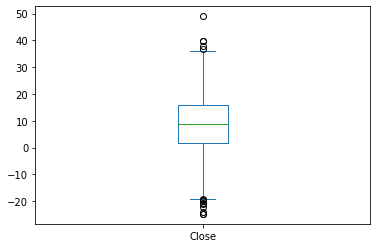

In [31]:
# Visualizing the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

## A Minor Change of Plans

In [32]:
'''During this activity I discovered that late in the dataset there were very few opportunities to make
a trade that had greater than 1% profit, therefore, for this exercise to be meaningful I decided to 
calculate the profit that would have been made running arbitrage for a whole month as opposed to one day. 
If you wish to calculate arbitrage opportunities available in a single day, 
simply add a specific day to the dates I've used.

EX:['2018-01-15]'''

# Measuring the arbitrage spread for the whole month by subtracting the lower price exchange 
# (Coinbase) from the higher price exchange (Bitstamp)
arbitrage_spread_early=bitstamp_sliced.loc['2018-01'] - coinbase_sliced.loc['2018-01']
arbitrage_spread_middle=bitstamp_sliced.loc['2018-02'] - coinbase_sliced.loc['2018-02']
arbitrage_spread_late=bitstamp_sliced.loc['2018-03'] - coinbase_sliced.loc['2018-03']

# Statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()

count    44515.000000
mean        18.025886
std         67.336080
min       -606.800000
25%        -19.050000
50%         12.950000
75%         40.510000
max        439.050000
Name: Close, dtype: float64

In [33]:
arbitrage_spread_middle.describe()

count    40049.000000
mean         5.614167
std         21.308942
min       -188.550000
25%         -6.610000
50%          6.130000
75%         18.300000
max        280.010000
Name: Close, dtype: float64

In [34]:
arbitrage_spread_late.describe()

count    44288.000000
mean         3.980801
std         12.405108
min       -130.030000
25%         -3.490000
50%          3.910000
75%         11.400000
max        147.650000
Name: Close, dtype: float64

## For Arbitrage Opportunites >0 Calculate the % Spread

In [35]:
# This line of code calculates the arbitrage spread as a percentage by dividing the spread by the price of the purchased bitcoin.
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0]/coinbase_sliced.loc['2018-01']

# Review the spread return DataFrame
spread_return_early.describe()

count    2.719700e+04
mean     4.417379e-03
std      5.505588e-03
min      5.952384e-07
25%      1.390774e-03
50%      2.762309e-03
75%      4.682019e-03
max      3.850968e-02
Name: Close, dtype: float64

In [36]:
#Calulating arbitrage spread percentage in the middle data range
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0]/coinbase_sliced.loc['2018-02']

spread_return_middle.describe()

count    2.524400e+04
mean     1.950254e-03
std      1.921827e-03
min      8.539717e-07
25%      7.767915e-04
50%      1.540783e-03
75%      2.563954e-03
max      3.721067e-02
Name: Close, dtype: float64

In [37]:
#Calulating arbitrage spread in the late data range
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0]/coinbase_sliced.loc['2018-03']

spread_return_late.describe()

count    2.817300e+04
mean     1.200150e-03
std      9.093192e-04
min      8.769630e-07
25%      5.127249e-04
50%      1.021450e-03
75%      1.697381e-03
max      1.827580e-02
Name: Close, dtype: float64

## Narrow Opportunities to those that Yield >1% Profit

In [38]:
# This line of code reduces our dataframe to only include trades that yield >1% profit to cover trading costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-01 01:58:00    0.010291
2018-01-03 03:30:00    0.016303
2018-01-04 14:12:00    0.010751
2018-01-05 04:02:00    0.010525
2018-01-05 04:03:00    0.010329
Name: Close, dtype: float64

In [39]:
# middle
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

profitable_trades_middle.head()

Timestamp
2018-02-01 15:31:00    0.013040
2018-02-02 06:50:00    0.012374
2018-02-02 07:17:00    0.010137
2018-02-02 07:27:00    0.012033
2018-02-02 07:28:00    0.011289
Name: Close, dtype: float64

In [40]:
# late
profitable_trades_late = spread_return_late[spread_return_late > .01]

profitable_trades_late.head()

Timestamp
2018-03-11 13:47:00    0.010203
2018-03-12 05:31:00    0.011352
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
Name: Close, dtype: float64

## Summary Statistics for Remaining Trades

In [41]:
# Showing summary statistics for the profitable trades in the early data range
profitable_trades_early.describe()

count    2659.000000
mean        0.019190
std         0.005649
min         0.010001
25%         0.014693
50%         0.019162
75%         0.022687
max         0.038510
Name: Close, dtype: float64

In [42]:
# middle
profitable_trades_middle.describe()

count    193.000000
mean       0.015042
std        0.005436
min        0.010040
25%        0.011207
50%        0.013546
75%        0.016478
max        0.037211
Name: Close, dtype: float64

In [43]:
# late- This dataframe is why I decided to modify the activity. 
# There are only 6 profitable trades in the month of march.
profitable_trades_late.describe()

count    6.000000
mean     0.013106
std      0.003114
min      0.010203
25%      0.011310
50%      0.011677
75%      0.014632
max      0.018276
Name: Close, dtype: float64

## Calculating Potential Profit!

In [44]:
# This code calculates the actual profit in dollars per trade by multiplying the % profit of the trade by
# the purchase price of the BTC
profit_early = profitable_trades_early*coinbase_sliced.loc['2018-01']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-01 01:58:00    142.00
2018-01-03 03:30:00    247.65
2018-01-04 14:12:00    159.12
2018-01-05 04:02:00    163.00
2018-01-05 04:03:00    160.00
                        ...  
2018-01-29 12:24:00    116.54
2018-01-29 12:31:00    128.44
2018-01-29 12:33:00    121.93
2018-01-29 12:37:00    111.42
2018-01-29 12:39:00    112.75
Name: Close, Length: 2659, dtype: float64

In [45]:
# middle
profit_middle = profitable_trades_middle*coinbase_sliced.loc['2018-02']

profit_per_trade_middle = profit_middle.dropna()

profit_per_trade_middle

Timestamp
2018-02-01 15:31:00    115.93
2018-02-02 06:50:00     97.67
2018-02-02 07:17:00     79.12
2018-02-02 07:27:00     92.86
2018-02-02 07:28:00     87.08
                        ...  
2018-02-06 19:41:00     92.51
2018-02-06 19:46:00     94.79
2018-02-06 19:49:00    110.55
2018-02-08 18:23:00     90.49
2018-02-20 17:57:00    254.00
Name: Close, Length: 193, dtype: float64

In [46]:
# late
profit_late = profitable_trades_late*coinbase_sliced.loc['2018-03']

profit_per_trade_late = profit_late.dropna()

profit_per_trade_late

Timestamp
2018-03-11 13:47:00     96.92
2018-03-12 05:31:00    110.00
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

## Summary Statistics and Plots for Profit!

In [47]:
# Generating the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    2659.000000
mean      217.077924
std        65.624787
min        94.290000
25%       163.800000
50%       215.570000
75%       258.085000
max       439.050000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Profits'}, xlabel='Timestamp'>

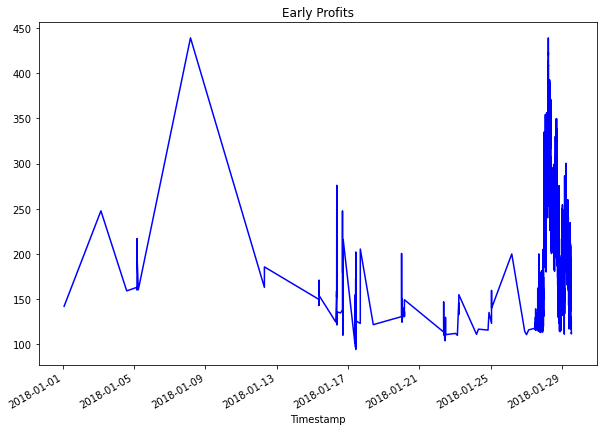

In [48]:
# Plotting the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title='Early Profits', figsize=(10,7), color='Blue')

In [49]:
# Middle
profit_per_trade_middle.describe()

count    193.000000
mean     103.130466
std       41.133389
min       61.120000
25%       71.600000
50%       92.860000
75%      119.180000
max      280.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Profits'}, xlabel='Timestamp'>

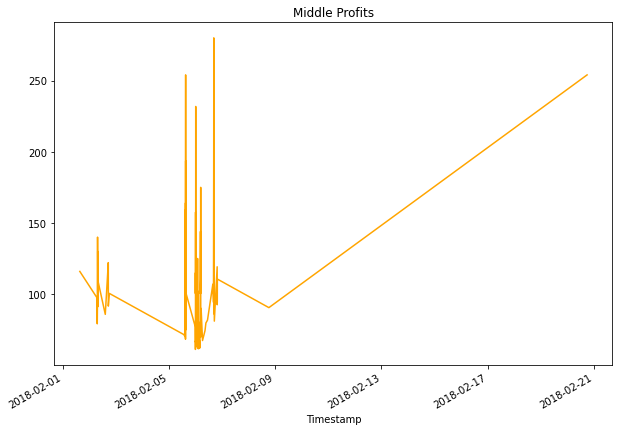

In [50]:
profit_per_trade_middle.plot(title='Middle Profits', figsize=(10,7), color='Orange')

In [51]:
#Late
profit_per_trade_late.describe()

count      6.000000
mean     111.551667
std       21.493070
min       91.890000
25%       96.995000
50%      103.610000
75%      121.722500
max      147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Profits'}, xlabel='Timestamp'>

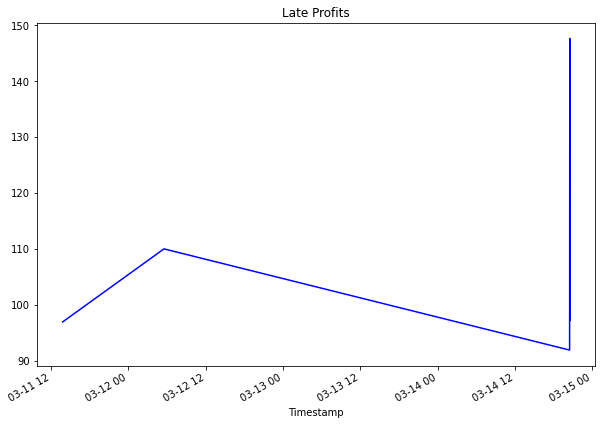

In [52]:
profit_per_trade_late.plot(title='Late Profits', figsize=(10,7), color='Blue')

## The Total Profit for Running the Arbitrage for 1 Month

In [53]:
# Calculating the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

577210.2000000001

In [54]:
# middle
profit_per_trade_middle.sum()

19904.18

In [55]:
profit_per_trade_late.sum()

669.3099999999977

## Visualizing Our Profits and Final Comment

In [56]:
# Using the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Early Profits Cumulative'}, xlabel='Timestamp'>

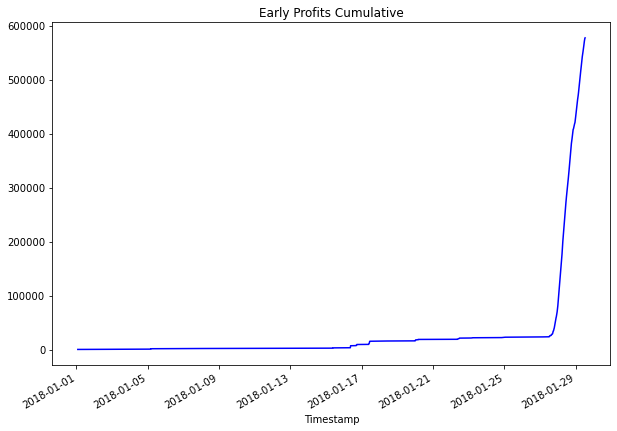

In [57]:
# Plotting the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title='Early Profits Cumulative', figsize= (10,7), color='blue')

In [58]:
# Middle
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Middle Profits Cumulative'}, xlabel='Timestamp'>

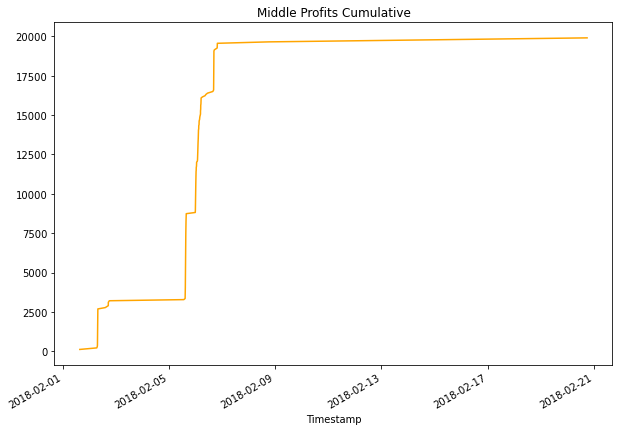

In [59]:
cumulative_profit_middle.plot(title='Middle Profits Cumulative', figsize=(10,7), color='orange')

In [60]:
# Late
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Late Profit Cumulative'}, xlabel='Timestamp'>

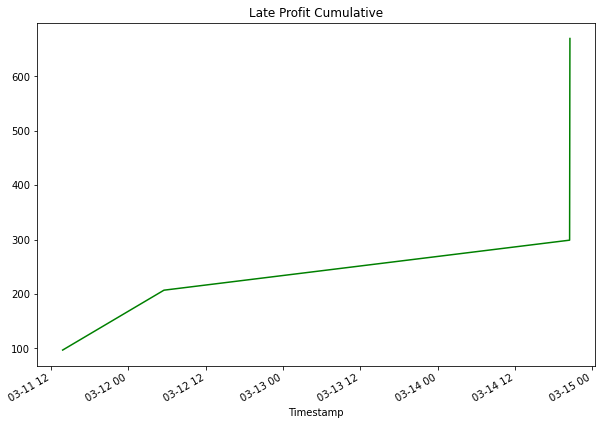

In [61]:
cumulative_profit_late.plot(title='Late Profit Cumulative', figsize=(10,7), color='green')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage opportunities quickly declined during 2018. The profits that were available were made within a few days or even one day during the month.